In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

mnist = loadmat('datasets/mnist-original.mat')
X = mnist['data']
y = mnist['label']
X = X.T
y = y.reshape(70000,)

In [2]:
from sklearn.decomposition import PCA
pca = PCA(0.90)
pca.fit(X)
X_reduction = pca.transform(X)

In [3]:
pca.n_components_

87

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=5000, oob_score=True, random_state=666, n_jobs=-1)
rf_clf.fit(X_reduction, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=5000,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=666, verbose=0, warm_start=False)

In [5]:
rf_clf.oob_score_

0.9547

### n_estimators=1000, max_leaf_nodes=5000的意思是 使用了1000个决策树的分类器，而每一个分类器最多只能有5000个叶子节点

### 这段代码中，使用的取数据的方法是老师课上介绍的自助法，oob_score_的结果0.9547是对从来没有取到过的数据进行预测所得到的准确率

### 代码中使用的测试数据集是mnist手写数据集，其官方网站是http://yann.lecun.com/exdb/mnist/

In [6]:
from PIL import Image

In [31]:
three = Image.open('three.png' ).convert('L')
three = np.array(three)

In [32]:
three.shape

(28, 28)

In [33]:
three = three.reshape(-1,)
np.savetxt("X.txt", three,fmt='%d,',newline='')

In [10]:
three = 255 - three

In [11]:
three

array([  2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,  11,  18,  15,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,  17, 101, 191, 255, 255, 255, 211,  80,   3,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,  19, 136, 244, 255, 255, 255, 255, 255, 255, 255, 167,   4,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2, 211, 255, 255, 255, 255, 253, 241, 251, 255, 255,
       255, 116,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   4, 244, 255, 255, 212, 113,  27,   2,  30,
       162, 255, 255, 251,  45,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,  73, 160,  84,   3,   

In [12]:
three_reduction = pca.transform(three.reshape(1,-1))
rf_clf.predict(three_reduction)

array([3.])

### 可以看出，代码成功预测出了3

In [30]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [14]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.3, wspace=0.3)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()

In [15]:
example_digits = X[y==0,:][22:32]
for num in range(1,10):
    example_digits = np.vstack([example_digits, X[y==num,:][22:32]])

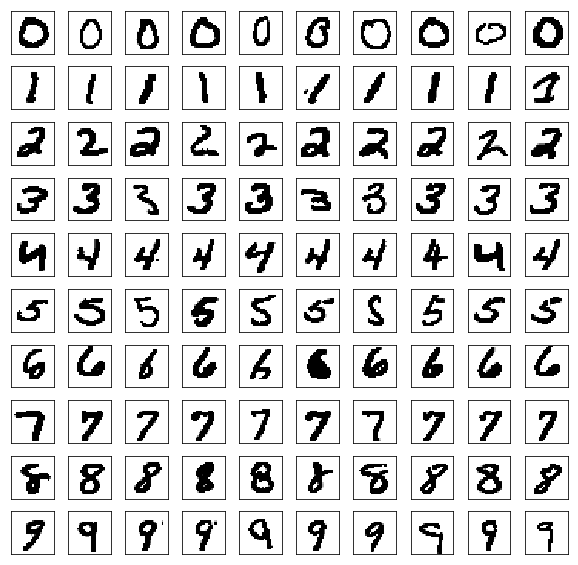

In [16]:
plot_digits(example_digits)

In [17]:
noisy_digits = example_digits + np.random.normal(0, 10, size=example_digits.shape)

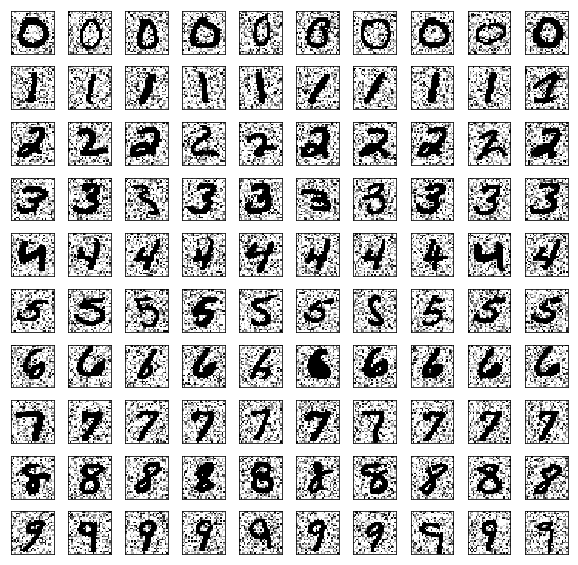

In [18]:
plot_digits(noisy_digits)

In [19]:
pca_test = PCA(0.5)
pca.fit(noisy_digits)
noisy_digits_reduction = pca.transform(noisy_digits)

In [20]:
noisy_digits_recover = pca.inverse_transform(noisy_digits_reduction)

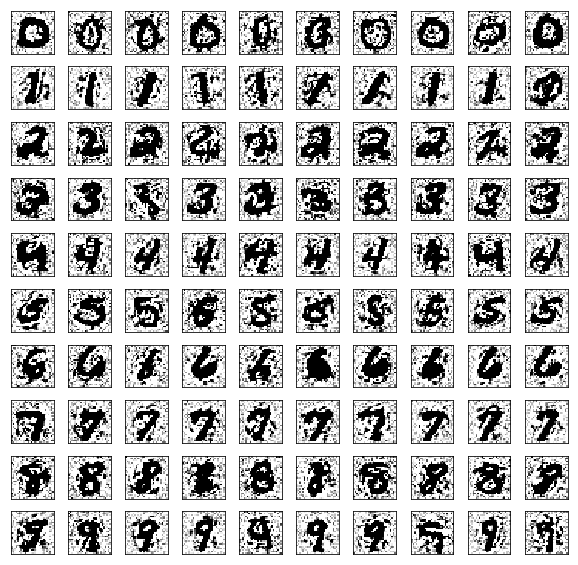

In [21]:
plot_digits(noisy_digits_recover)

In [22]:
#rf_clf2 = RandomForestClassifier(n_estimators=10000, max_leaf_nodes=5000, oob_score=True, random_state=666, n_jobs=-1)
#rf_clf2.fit(X_reduction, y)
#rf_clf2.oob_score_

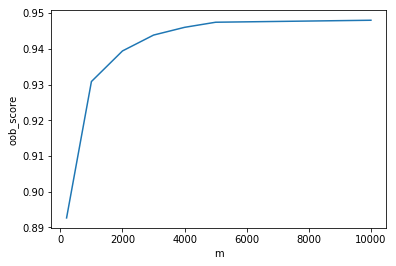

In [23]:
m = [200,1000,2000,3000,4000,5000,10000]
sco = [0.8926285714285714,0.9308428571428572,0.9394142857142858,0.9438571428571428,0.9460285714285714,0.9474571428571429,0.9480142857142857]
plt.plot(m,sco)
plt.xlabel('m')
plt.ylabel('oob_score')
plt.show()


